In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd

import sys

sys.path.append('T:\EL_experiment\Codes\CCEP_human\Python_Analysis/py_functions')
import platform
from glob import glob
import basic_func as bf
from pathlib import Path
import LL_funcs as LLf
import freq_funcs as ff
import h5py

dist_groups = np.array([[0, 30], [30, 60], [60, 120]])
dist_labels = ['local (<30 mm)', 'short (<60mm)', 'long']
Fs = 500
dur = np.zeros((1, 2), dtype=np.int32)
t0 = 1
dur[0, 0] = -t0
dur[0, 1] = 3

folder = 'BrainMapping'
# dur[0,:]       = np.int32(np.sum(abs(dur)))
x_ax = np.arange(dur[0, 0], dur[0, 1], (1 / Fs))
color_elab = np.zeros((3, 3))
color_elab[0, :] = np.array([31, 78, 121]) / 255
color_elab[1, :] = np.array([189, 215, 238]) / 255
color_elab[2, :] = np.array([0.256, 0.574, 0.431])
cwd = os.getcwd()
sub_path  ='X:\\4 e-Lab\\' # y:\\eLab

In [3]:
t_0 = 1
w = 0.25

In [2]:
subj = 'EL028'
cond_folder = 'CR'  # Condition = 'Hour', 'Condition', 'Ph'

if cond_folder == 'Ph':
    cond_vals = np.arange(4)
    cond_labels = ['BM', 'BL', 'Fuma', 'BZD']
    cond_colors = ['#494159', '#594157', "#F1BF98", "#8FB996"]
    cond1 = 'Condition'  # 'condition', 'h'
    cond_folder = 'Ph'  # 'Ph', 'Sleep', 'CR'
    Condition = 'Condition'
if cond_folder == 'CR':
    Condition = 'Hour'  # Condition = 'Hour'
    cond1 = 'h'  # h (as stored in stimlist)

######## General Infos

path_patient_analysis = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\\' + subj
path_gen = os.path.join(sub_path+'\Patients\\' + subj)
if not os.path.exists(path_gen):
    path_gen = 'T:\\EL_experiment\\Patients\\' + subj
path_patient = path_gen + '\Data\EL_experiment'  # os.path.dirname(os.path.dirname(cwd))+'/Patients/'+subj
path_infos = os.path.join(path_gen, 'Electrodes')
if not os.path.exists(os.path.join(path_infos, subj + "_labels.xlsx")):
    path_infos = os.path.join(path_gen, 'infos')
if not os.path.exists(path_infos):
    path_infos = path_gen + '\\infos'

sep = ';'
Fs = 500
Path(path_patient_analysis + '\\' + folder + '/' + cond_folder + '/data').mkdir(parents=True, exist_ok=True)
Path(path_patient_analysis + '\\' + folder + '/' + cond_folder + '/BM_plot_trial').mkdir(parents=True, exist_ok=True)
Path(path_patient_analysis + '\\' + folder + '/' + cond_folder + '/figures/single_con').mkdir(parents=True,
                                                                                              exist_ok=True)
Path(path_patient_analysis + '\\' + folder + '/' + cond_folder + '/figures/Pipeline').mkdir(parents=True, exist_ok=True)

# get labels
if cond_folder == 'Ph':
    files_list = glob(path_patient_analysis + '\\' + folder + '/data/Stim_list_*Ph*')
else:
    files_list = glob(path_patient_analysis + '\\' + folder + '/data/Stim_list_*')
i = 0
stimlist = pd.read_csv(files_list[i])
EEG_resp = np.load(path_patient_analysis + '\\' + folder + '/data/ALL_resps_'+files_list[i][-11:-4]+'.npy')

lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
if "type"in lbls:
    lbls = lbls[lbls.type=='SEEG']
    lbls = lbls.reset_index(drop=True)
labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
    stimlist,
    lbls)

labels_h = lbls.Hemisphere + '_' + labels_all

badchans = pd.read_csv(path_patient_analysis + '\\' + folder + '/data/badchan.csv')
bad_chans = np.unique(np.array(np.where(badchans.values[:, 1] == 1))[0, :])

bad_region = np.where((labels_region == 'WM') | (labels_region == 'OUT') | (labels_region == 'Putamen'))[0]

file_con_all = path_patient_analysis + '\\' + folder + '/' + cond_folder + '/data/con_trial_all.csv'
file_con = path_patient_analysis + '\\' + folder + '/' + cond_folder + '/data/con_trial_all.csv'
######### Load data
data_all = 1
rerun = 0
if os.path.isfile(file_con):
    # con_trial
    con_trial = pd.read_csv(file_con)
else:
    file_con = path_patient_analysis + '\\' + folder + '/' + cond_folder + '/data/con_trial_01_CR01.csv'
    con_trial = pd.read_csv(file_con)
    data_all = 0
    
M = np.load(path_patient_analysis + '\\' + folder + '/' + cond_folder + '/data/M01.npy')

In [4]:
h5_file = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\data\\EEG_' + cond_folder + '.h5'
if os.path.isfile(h5_file):
    print('loading h5')
    EEG_resp = h5py.File(h5_file)
    EEG_resp = EEG_resp['EEG_resp']

loading h5


In [5]:
Fs             = 500
dur            = np.zeros((1,2), dtype=np.int32)
t0 = 1
dur[0,0] =  -t0
dur[0,1] =  3

#dur[0,:]       = np.int32(np.sum(abs(dur)))
x_ax           = np.arange(dur[0,0],dur[0,1],(1/Fs))
color_elab      = np.zeros((3,3))
color_elab[0,:] = np.array([31, 78, 121])/255
color_elab[1,:] = np.array([189, 215, 238])/255
color_elab[2,:] = np.array([0.256, 0.574, 0.431])

In [14]:
con_trial.Chan = con_trial.Chan.astype('int')
con_trial.Stim = con_trial.Stim.astype('int')
con_trial.Num = con_trial.Num.astype('int')
con_trial.Num_block = con_trial.Num_block.astype('int')
con_trial = con_trial.drop(columns=['Num_block', 'Date', 'Sleep', 'Block', 'Hour', 'P2P', 'P2P_BL'])

AttributeError: 'DataFrame' object has no attribute 'Num_block'

In [7]:
con_mean = con_trial[con_trial.Artefact<1].groupby(['Stim', 'Chan'], as_index=False)[['LL', 'd']].mean()
con_mean.insert(3, 'Sig', 0)

In [16]:
for i in range(len(M)):
    for j in range(len(M)):
        if ~np.isnan(M[i,j]): 
            con_mean.loc[(con_mean.Stim==i)&(con_mean.Chan==j),'Sig'] = np.array(M[i,j]>0)*1

## Preliminary BM

##### single connection example

In [6]:
def plot_connection(sc, rc):
    data = con_trial[(con_trial.Stim==sc)&(con_trial.Chan==rc)&(con_trial.Artefact<1)]
    stimnum = data.Num.values.astype('int')
    resp = np.mean(EEG_resp[rc,stimnum,:],0)
    resp = ff.lp_filter(resp, 45, Fs)
    resp_LL = LLf.get_LL_all(np.expand_dims(resp,[0,1]), Fs, 0.25)[0][0]
    thr = np.percentile(np.concatenate([resp_LL[int((w / 2) * Fs):int((t_0 - w / 2) * Fs)],
                                                resp_LL[int(3 * Fs):int((4 - w / 2) * Fs)]]),99)

    fig, axes = plt.subplots(2, figsize=(8,10))
    plt.suptitle(labels_all[sc]+' -- '+labels_all[rc]+', d: '+str(data.d.values[0])+'mm', fontsize=15)
    fig.patch.set_facecolor('xkcd:white')
    axes[0].plot(x_ax, resp, color= color_elab[0], linewidth=5)
    #axes[0].set_ylim([-300,300])
    axes[0].set_xlabel('', fontsize=15)
    axes[0].set_ylabel('uV', fontsize=15)
    axes[0].set_title('CCEP', fontsize=15)
    # axes[0].axvspan((np.argmax(resp_LL)-Fs)/Fs-0.125, (np.argmax(resp_LL)-Fs)/Fs+0.125, color=[0,0,0], alpha=0.1, label = 'LL peak window')
    # axes[0].legend(fontsize=20)
    axes[1].plot(x_ax+0.125, resp_LL, color= color_elab[0], linewidth=5)
    resp_LL[:500] = 0
    resp_LL[800:] = 0
    axes[1].plot((np.argmax(resp_LL)-Fs)/Fs+0.125, np.max(resp_LL), 'ko', markersize=10, label = 'LL peak')

    axes[1].set_xlabel('time [s]', fontsize=15)
    axes[1].set_ylabel('LL [uV/ms]', fontsize=15)
    axes[1].set_title('LL transform (w=0.25s)', fontsize=15)
    axes[1].axhline(thr, color=[0.3,0,0], linewidth=4, label = 'thr')
    lim = np.max([4, np.ceil(1.25*np.max(resp_LL))])
    axes[1].set_ylim([0,lim])
    axes[1].legend(fontsize=10)

    for i in range(2):
        axes[i].set_xlim([-0.5, 1.5])
        axes[i].tick_params(axis='both', which='major', labelsize=10)
        axes[i].axvline(0, color=[1,0,0], linewidth=4)
    plt.tight_layout()

In [17]:
# find long distance connection
con_sel = con_mean[(con_mean.Sig ==1)&(con_mean.d>30)].reset_index(drop=True)

In [7]:
labels_all

array(['HIPP1', 'Amy2', 'Amy3', 'Amy4', 'WM5', 'STS6', 'STS7', 'STS8',
       'STG9', 'HIPP10', 'HIPP11', 'HIPP12', 'CollatS_ant13',
       'CollatS_ant14', 'CollatS_ant15', 'ITS16', 'ITS17', 'MTG18',
       'CircIS_ant19', 'CircIS_ant20', 'TransOrS21', 'OrG22', 'OrG23',
       'IFGorb24', 'RostrS25', 'ACCG26', 'MedOrS27', 'TransOrS28',
       'TransOrS29', 'TransOrS30', 'TransOrS31', 'TransOrS32',
       'TransOrS33', 'LatS_hor34', 'LatS_hor35', 'HIPP36', 'Amy37',
       'Amy38', 'WM39', 'STS40', 'STS41', 'STS42', 'STG43', 'STG44',
       'ENT45', 'ENT46', 'ENT47', 'ITS48', 'ITS49', 'STS50', 'STS51',
       'MTG52', 'HIPP53', 'HIPP54', 'HIPP55', 'CollatS_ant56',
       'CollatS_ant57', 'STS58', 'STS59', 'STS60', 'STS61', 'MTG62',
       'HIPP63', 'HIPP64', 'HIPP65', 'CollatS_ant66', 'CollatS_ant67',
       'STS68', 'STS69', 'STS70', 'MTG71', 'MTG72', 'LIG73', 'LIG74',
       'SIG75', 'SIG76', 'SIG77', 'SIG78', 'SIG79', 'CircIS_sup80',
       'CircIS_sup81', 'WM82', 'WM83', 'MFS84', 'M

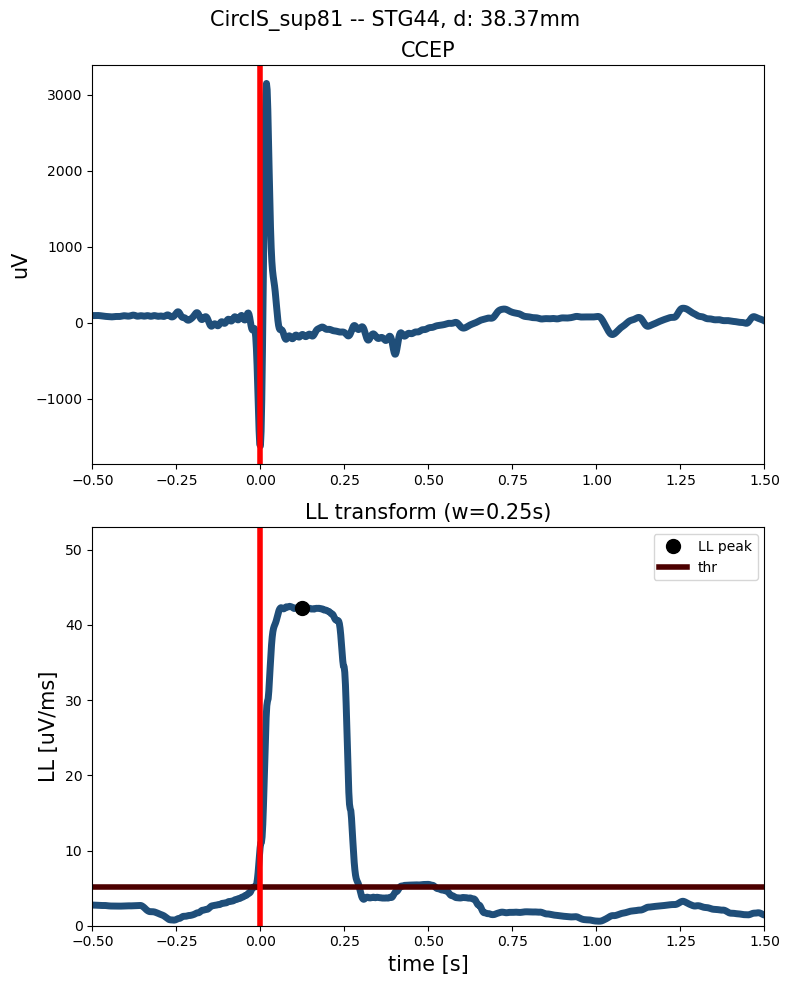

In [33]:
k = np.random.choice(len(con_sel))
plot_connection(con_sel.Stim.values[k],con_sel.Chan.values[k])

In [61]:
labels_all

array(['HIPP1', 'Amy2', 'Amy3', 'Amy4', 'WM5', 'STS6', 'STS7', 'STS8',
       'STG9', 'HIPP10', 'HIPP11', 'HIPP12', 'CollatS_ant13',
       'CollatS_ant14', 'CollatS_ant15', 'ITS16', 'ITS17', 'MTG18',
       'CircIS_ant19', 'CircIS_ant20', 'TransOrS21', 'OrG22', 'OrG23',
       'IFGorb24', 'RostrS25', 'ACCG26', 'MedOrS27', 'TransOrS28',
       'TransOrS29', 'TransOrS30', 'TransOrS31', 'TransOrS32',
       'TransOrS33', 'LatS_hor34', 'LatS_hor35', 'HIPP36', 'Amy37',
       'Amy38', 'WM39', 'STS40', 'STS41', 'STS42', 'STG43', 'STG44',
       'ENT45', 'ENT46', 'ENT47', 'ITS48', 'ITS49', 'STS50', 'STS51',
       'MTG52', 'HIPP53', 'HIPP54', 'HIPP55', 'CollatS_ant56',
       'CollatS_ant57', 'STS58', 'STS59', 'STS60', 'STS61', 'MTG62',
       'HIPP63', 'HIPP64', 'HIPP65', 'CollatS_ant66', 'CollatS_ant67',
       'STS68', 'STS69', 'STS70', 'MTG71', 'MTG72', 'LIG73', 'LIG74',
       'SIG75', 'SIG76', 'SIG77', 'SIG78', 'SIG79', 'CircIS_sup80',
       'CircIS_sup81', 'WM82', 'WM83', 'MFS84', 'M

In [7]:
sc_all, rc_all = np.where(M>0) #all connection pairs
k = -1

In [14]:
labels_clinic[29]

'OF-R-6-OF-R-7'

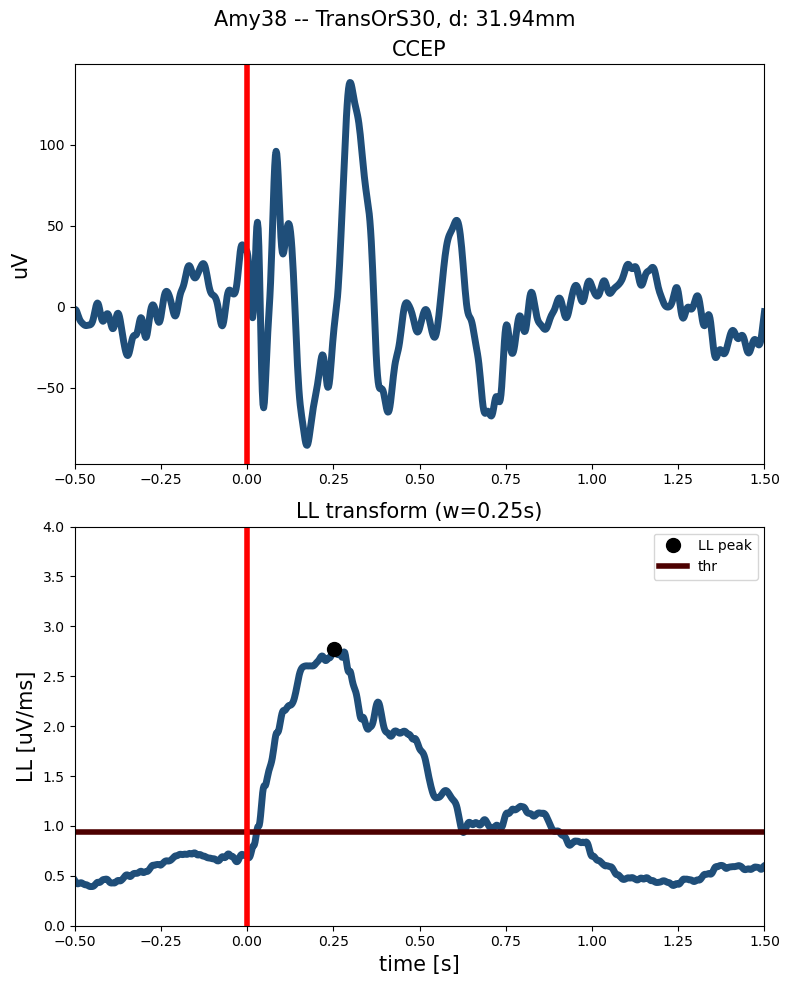

In [21]:
sc = 37
rc = 29
plot_connection(sc,rc)